📈 MODEL EVALUATION
Total Ratings: 81,116
Total Users: 610
Total Movies: 2,269
Average Ratings per User: 133.0
Average Ratings per Movie: 35.7


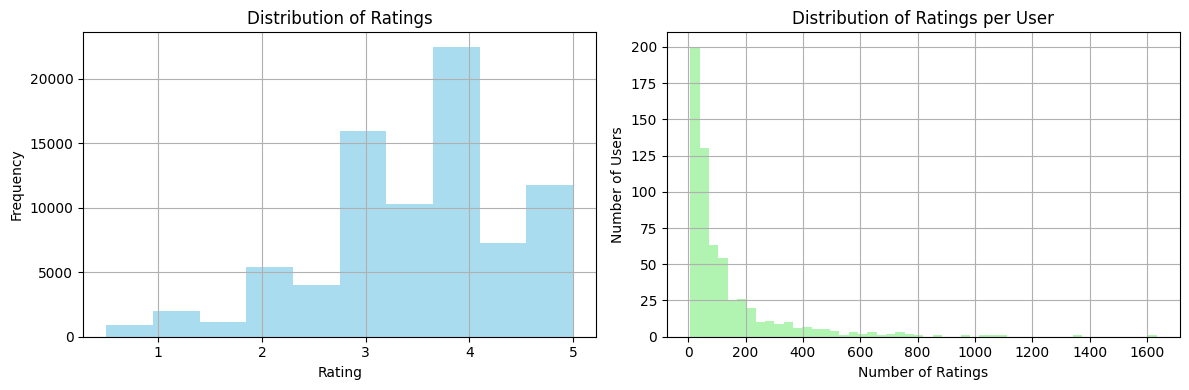


📊 DATA SPARSITY ANALYSIS:
Users: 610
Movies: 2,269
Total Possible Ratings: 1,384,090
Actual Ratings: 81,116
Sparsity: 94.14%

🎭 GENRE DISTRIBUTION:
'    44168
r    15892
a    13643
e    13084
     12410
,    12342
m    12050
o    10308
[     9742
]     9742
Name: count, dtype: int64

✅ Evaluation completed! Results saved to '../data/evaluation_results.json'


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
movies_processed = pd.read_csv('../data/movies_processed.csv')
ratings_processed = pd.read_csv('../data/ratings_processed.csv')

print("📈 MODEL EVALUATION")
print("="*50)

# Basic statistics
print(f"Total Ratings: {len(ratings_processed):,}")
print(f"Total Users: {ratings_processed['userId'].nunique():,}")
print(f"Total Movies: {ratings_processed['movieId'].nunique():,}")
print(f"Average Ratings per User: {ratings_processed.groupby('userId').size().mean():.1f}")
print(f"Average Ratings per Movie: {ratings_processed.groupby('movieId').size().mean():.1f}")

# Rating distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ratings_processed['rating'].hist(bins=10, alpha=0.7, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
user_rating_counts = ratings_processed.groupby('userId').size()
user_rating_counts.hist(bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.savefig('../data/evaluation_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Sparsity calculation
n_users = ratings_processed['userId'].nunique()
n_movies = ratings_processed['movieId'].nunique()
total_possible_ratings = n_users * n_movies
actual_ratings = len(ratings_processed)
sparsity = (1 - (actual_ratings / total_possible_ratings)) * 100

print(f"\n📊 DATA SPARSITY ANALYSIS:")
print(f"Users: {n_users:,}")
print(f"Movies: {n_movies:,}")
print(f"Total Possible Ratings: {total_possible_ratings:,}")
print(f"Actual Ratings: {actual_ratings:,}")
print(f"Sparsity: {sparsity:.2f}%")

# Genre analysis
print(f"\n🎭 GENRE DISTRIBUTION:")
all_genres = []
for genres in movies_processed['genres_list']:
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts.head(10))

# Save evaluation results
evaluation_results = {
    'total_ratings': len(ratings_processed),
    'total_users': n_users,
    'total_movies': n_movies,
    'sparsity': sparsity,
    'avg_ratings_per_user': ratings_processed.groupby('userId').size().mean(),
    'avg_ratings_per_movie': ratings_processed.groupby('movieId').size().mean()
}

import json
with open('../data/evaluation_results.json', 'w') as f:
    json.dump(evaluation_results, f, indent=2)

print("\n✅ Evaluation completed! Results saved to '../data/evaluation_results.json'")